# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Muhammad Hilmy Adhi Pradityo
- Email: kangpradityo73
- ID Dicoding: kangpradityo73

## Menentukan Pertanyaan Bisnis

- Bagaimana Persebaran Jumlah User per Jam-nya?
- Dalam Kondisi/Cuaca Apa yang Memiliki User Terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("C:/Users/Adhi Pradityo/OneDrive/Documents/project dicoding/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("C:/Users/Adhi Pradityo/OneDrive/Documents/project dicoding/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
day_df.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)
day_df.head()

,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
hour_df.rename(columns={'dteday':'Date','yr':'Year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'},inplace =True)
hour_df.head()

,instant,Date,season,Year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore day.csv

In [16]:
day_df.describe(include="all")

C:\Users\Adhi Pradityo\AppData\Local\Temp\ipykernel_18036\282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [17]:
day_df.groupby(by="month").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
      nunique   max   min         mean          std
month                                              
1          62  4521   431  2176.338710  1161.674370
2          57  5062  1005  2655.298246  1145.313307
3          62  8362   605  3692.258065  1899.301812
4          60  7460   795  4484.900000  1776.160778
5          62  8294  2633  5349.774194  1298.711561
6          60  8120  3767  5772.366667  1240.400031
7          62  8173  3285  5563.677419  1273.751871
8          62  7865  1115  5664.419355  1494.516146
9          60  8714  1842  5766.516667  1810.130649
10         62  8156    22  5199.225806  1988.392517
11         60  6852  1495  4247.183333  1285.712709
12         62  6606   441  3403.806452  1549.639353

In [18]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

In [19]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

### Explore hour.csv

In [20]:
hour_df.describe(include="all")

C:\Users\Adhi Pradityo\AppData\Local\Temp\ipykernel_18036\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,Date,season,Year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [21]:
hour_df.groupby(by="hour").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                            
     nunique   max min        mean         std
hour                                          
0        726   283   2   53.898072   42.307910
1        724   168   1   33.375691   33.538727
2        715   132   1   22.869930   26.578642
3        697    79   1   11.727403   13.239190
4        697    28   1    6.352941    4.143818
5        717    66   1   19.889819   13.200765
6        725   213   1   76.044138   55.084348
7        727   596   1  212.064649  161.441936
8        727   839   5  359.011004  235.189285
9        727   426  14  219.309491   93.703458
10       727   539   8  173.668501  102.205413
11       727   663  10  208.143054  127.495536
12       728   776   3  253.315934  145.081134
13       729   760  11  253.661180  148.107657
14       729   750  12  240.949246  147.271574
15       729   750   7  251.233196  144.632541
16       730   783  11  311.983562  148.682618
17       730   976  15  461.452055  232.656611
18       728   977  23  425.510989  224.639304
19       728   743  11  311.523352  161.050359
20       728   567  11  226.030220  119.670164
21       728   584   6  172.314560   89.788893
22       728   502   9  131.335165   69.937782
23       728   256   2   87.831044   50.846889

In [22]:
hour_df.groupby(by="hour").agg({
    "windspeed": ["max", "min", "mean", "std"]
})

windspeed                         
           max  min      mean       std
hour                                   
0       0.5821  0.0  0.161758  0.109649
1       0.7761  0.0  0.158659  0.112785
2       0.6866  0.0  0.154519  0.113041
3       0.6866  0.0  0.150929  0.110164
4       0.7164  0.0  0.155813  0.110902
5       0.5522  0.0  0.150342  0.104087
6       0.5821  0.0  0.157722  0.108289
7       0.5224  0.0  0.163916  0.105360
8       0.6119  0.0  0.176563  0.116166
9       0.6567  0.0  0.191262  0.125218
10      0.6418  0.0  0.202041  0.123312
11      0.6418  0.0  0.207339  0.123161
12      0.7164  0.0  0.216013  0.135704
13      0.6866  0.0  0.221633  0.130733
14      0.6567  0.0  0.232462  0.126821
15      0.8060  0.0  0.235143  0.134285
16      0.6418  0.0  0.237317  0.123149
17      0.8507  0.0  0.233371  0.129800
18      0.8507  0.0  0.224684  0.121120
19      0.6418  0.0  0.210148  0.116689
20      0.6418  0.0  0.195222  0.114262
21      0.8060  0.0  0.180871  0.116718
22      0.6567  0.0  0.174640  0.116865
23      0.6866  0.0  0.164802  0.110045

In [23]:
hour_df.groupby(by="hour").agg({
    "temp": ["max", "min", "mean", "std"]
})

temp                          
       max   min      mean       std
hour                                
0     0.82  0.04  0.467410  0.176550
1     0.82  0.04  0.459365  0.176498
2     0.82  0.02  0.454573  0.174807
3     0.80  0.02  0.453113  0.172499
4     0.78  0.02  0.446628  0.171371
5     0.78  0.02  0.436123  0.173457
6     0.80  0.02  0.432469  0.176661
7     0.80  0.02  0.439092  0.184456
8     0.84  0.02  0.454993  0.191244
9     0.86  0.04  0.476726  0.194848
10    0.92  0.04  0.500578  0.198130
11    0.94  0.06  0.522613  0.197818
12    0.96  0.06  0.540275  0.199211
13    0.96  0.08  0.554733  0.198297
14    0.96  0.10  0.565075  0.198187
15    0.96  0.12  0.568615  0.197608
16    1.00  0.12  0.564959  0.196834
17    0.98  0.12  0.554575  0.197380
18    0.96  0.08  0.541181  0.195319
19    0.92  0.08  0.524176  0.188999
20    0.92  0.06  0.508599  0.185639
21    0.88  0.06  0.495302  0.182269
22    0.84  0.06  0.484505  0.180696
23    0.84  0.04  0.475027  0.178362

In [24]:
hour_df.groupby(by="hour").agg({
    "humidity": ["max", "min", "mean", "std"]
})

humidity                          
          max   min      mean       std
hour                                   
0         1.0  0.00  0.691019  0.165626
1         1.0  0.00  0.704213  0.162478
2         1.0  0.00  0.716825  0.161669
3         1.0  0.14  0.729785  0.154668
4         1.0  0.15  0.742367  0.151702
5         1.0  0.00  0.742929  0.152462
6         1.0  0.00  0.744179  0.155904
7         1.0  0.00  0.730908  0.155874
8         1.0  0.00  0.702682  0.156791
9         1.0  0.00  0.661692  0.163851
10        1.0  0.00  0.616066  0.168697
11        1.0  0.00  0.571431  0.172939
12        1.0  0.00  0.536703  0.175864
13        1.0  0.00  0.511591  0.177726
14        1.0  0.00  0.496982  0.181532
15        1.0  0.00  0.492126  0.185846
16        1.0  0.00  0.495795  0.189231
17        1.0  0.00  0.513438  0.192056
18        1.0  0.00  0.535989  0.188767
19        1.0  0.00  0.572445  0.184826
20        1.0  0.00  0.601470  0.180573
21        1.0  0.00  0.631538  0.174616
22        1.0  0.00  0.653146  0.172688
23        1.0  0.00  0.673269  0.168252

## Visualization & Explanatory Analysis

### Bagaimana Persebaran Jumlah User per Jam-nya?

In [25]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   Date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   Year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

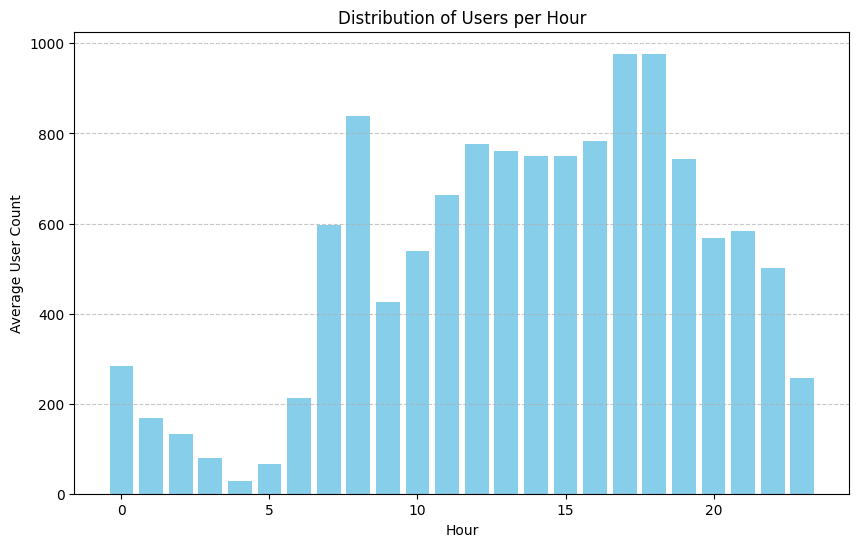

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(hour_df['hour'], hour_df['count'], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Average User Count')
plt.title('Distribution of Users per Hour')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Dalam Kondisi/Cuaca Apa yang Memiliki User Terbanyak?

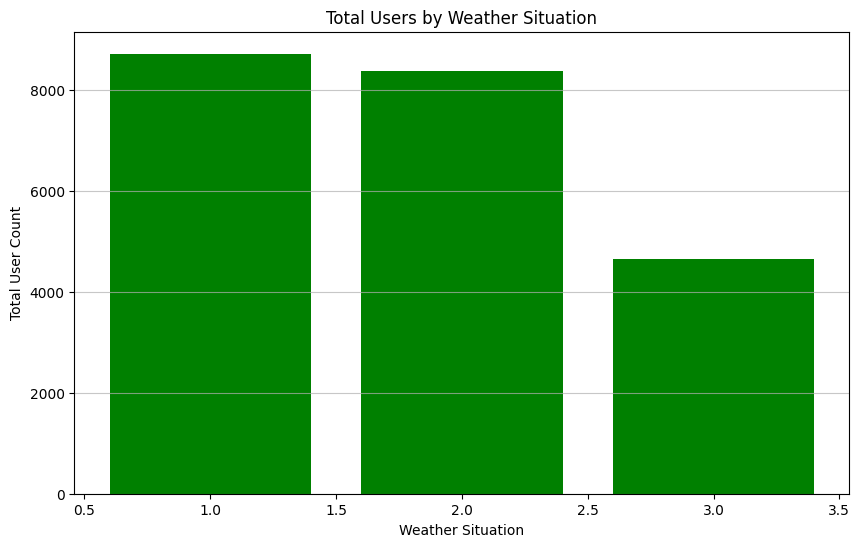

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(day_df['weathersit'], day_df['count'], color=['green'])  
plt.xlabel('Weather Situation')
plt.ylabel('Total User Count')
plt.title('Total Users by Weather Situation')
plt.grid(axis='y', alpha=0.7)
plt.show()

## Conclusion

- Di sini dapat disimpulkan kalau pada malam hari hingga fajar (23.00-05.00) memiliki rata-rata user yang paling sedikit dibanding jam lainnya, dan pada jam 17.00-18.00 merupakan jam dengan jumlah user terbanyak.
- Kondisi/cuaca dengan user terbanyak adalah di saat cuaca bersih/clear, diikuti cuaca dengan sedikit kabut dan berawan, serta cuaca dengan user paling sedikit adalah di saat cuaca bersalju.